In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import data
data = pd.ExcelFile('GordonChristopher_LE BN CR data for figures - Body Comp.xlsx')
sheetnames=data.sheet_names
# import all the worksheets
d={}
sheetname=[None] * 13
for i in range(13):
    name=sheetnames[i].replace(' ', '') # remove space from the worksheetname
    sheetname[i]=name
    if i == 0:
        globals()[name]= data.parse(sheetnames[i],header=1)
    else:
        globals()[name]= data.parse(sheetnames[i])
# clean up the data
mymice=np.arange(60)
for x in sheetname:
    existmice=np.where(pd.isnull(globals()[x].iloc[:,6])==False) # remove overfat and dead mice
    notaverow=np.where(pd.isnull(globals()[x].iloc[:,0])==False) # remove average row from data
    bothrow=np.intersect1d(existmice,notaverow) # the overlapping row within one worksheet
    mymice=np.intersect1d(mymice,bothrow) # overlapping between worksheet\
# get the 'new' dataset
newsheetname=[None] * 13
for i in range(13):
    x='new'+sheetname[i]
    newsheetname[i]=x
    globals()[x]=globals()[sheetname[i]].iloc[mymice,:] # only the mice never have miss any data

In [2]:
# test and train ind base on dataframe input
def test_train_id(data,test_frac):
    testnumber=round(len(data)*test_frac)
    ids=list(data.index)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    test.sort()
    train=ids[testnumber:]  
    train.sort()
    return train,test,testnumber
# days in experiment
day=[89,117,152,180,209,244,272,300,335,363,384,421,447]
daydiff=[0,117-89,152-89,180-89,209-89,244-89,272-89,300-89,335-89,363-89,384-89,421-89,447-89]
# six groups in experiment
groups=newPND89.Group.unique()

In [3]:
def group_measure(group,measure):
# random assign train and test ind based on 'first day'
    BLPND89=globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains(group,case=False)]
    train,test,testnumber=test_train_id(BLPND89,0.3)
# pull data based on ind
    trainweight=[None]*13
    testweight=[None]*13
    avetrainweight=[None]*13
    for i in range(13):
        bl1=globals()[sheetname[i]].iloc[test,:]
        testweight[i]=bl1[measure]
        bl2=globals()[sheetname[i]].iloc[train,:]
        trainweight[i]=bl2[measure]
        avetrainweight[i]=np.mean(bl2[measure])
    traindiff=[None]*13
    testdiff=[None]*13
    avetraindiff=[None]*13
    for i in range(0,13):
        if i==0:
            testdiff[i]=testweight[i]-testweight[0]
            traindiff[i]=trainweight[i]-trainweight[0]
            avetraindiff[i]=np.mean(traindiff[i])
        else:
            testdiff[i]=testweight[i]-testweight[0]
            traindiff[i]=trainweight[i]-trainweight[0]
            avetraindiff[i]=np.mean(traindiff[i])
            
# linear regression
    model = LinearRegression(fit_intercept=True)
    model.fit(np.asarray(daydiff)[:,np.newaxis], np.asarray(avetraindiff))
    slope=model.coef_
    intercept=model.intercept_

# "predict" based on day
    predict=model.predict(np.asarray(daydiff)[:, np.newaxis])

# check accuracy of the regression
   # error=sum(abs(testdiff[-1]-predict[-1])/testdiff[-1])
   # percenterror=error/2
    percenterror=np.mean(abs(testdiff[-1]-predict[-1])/abs(testdiff[-1]))
    return slope,intercept,percenterror,traindiff,avetraindiff,predict,testdiff

# Weight

BN ad lib percentage error is: 6.97 %

BN ad lib slope and intercept are [ 0.39555662] and 25.3386097658
BN 10% restriction percentage error is: 11.66 %

BN 10% restriction slope and intercept are [ 0.31114845] and 3.61032752963
BN 20% restriction percentage error is: 14.03 %

BN 20% restriction slope and intercept are [ 0.25113961] and -15.257815296
LE ad lib percentage error is: 3.29 %

LE ad lib slope and intercept are [ 0.6783379] and 67.6027629285
LE 10% restriction percentage error is: 21.93 %

LE 10% restriction slope and intercept are [ 0.63546122] and 32.8041049653
LE 20% restriction percentage error is: 10.88 %

LE 20% restriction slope and intercept are [ 0.47319847] and -14.7324818648


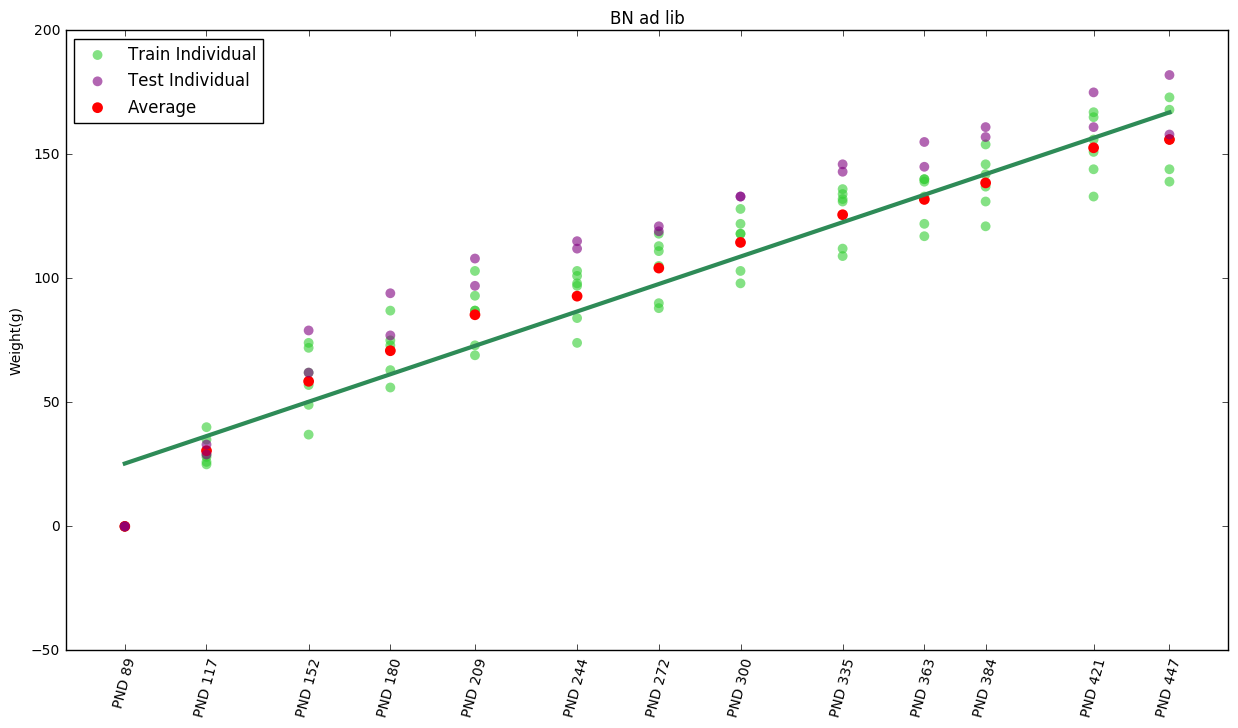

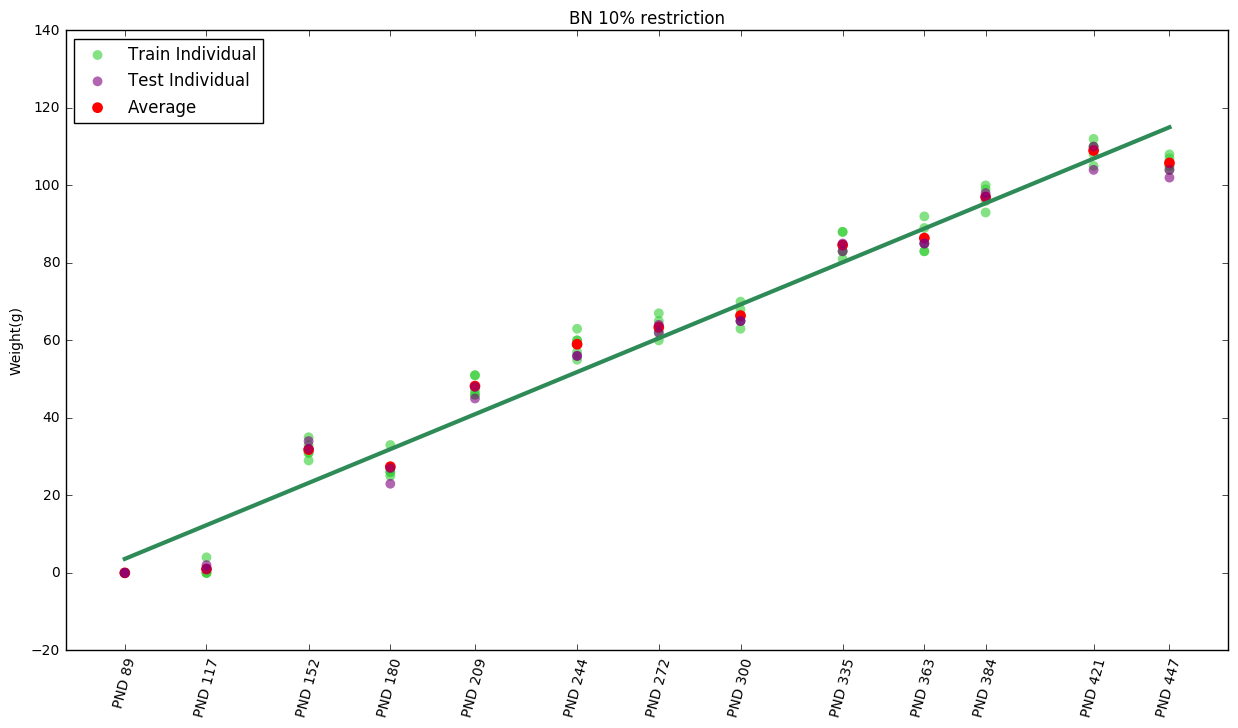

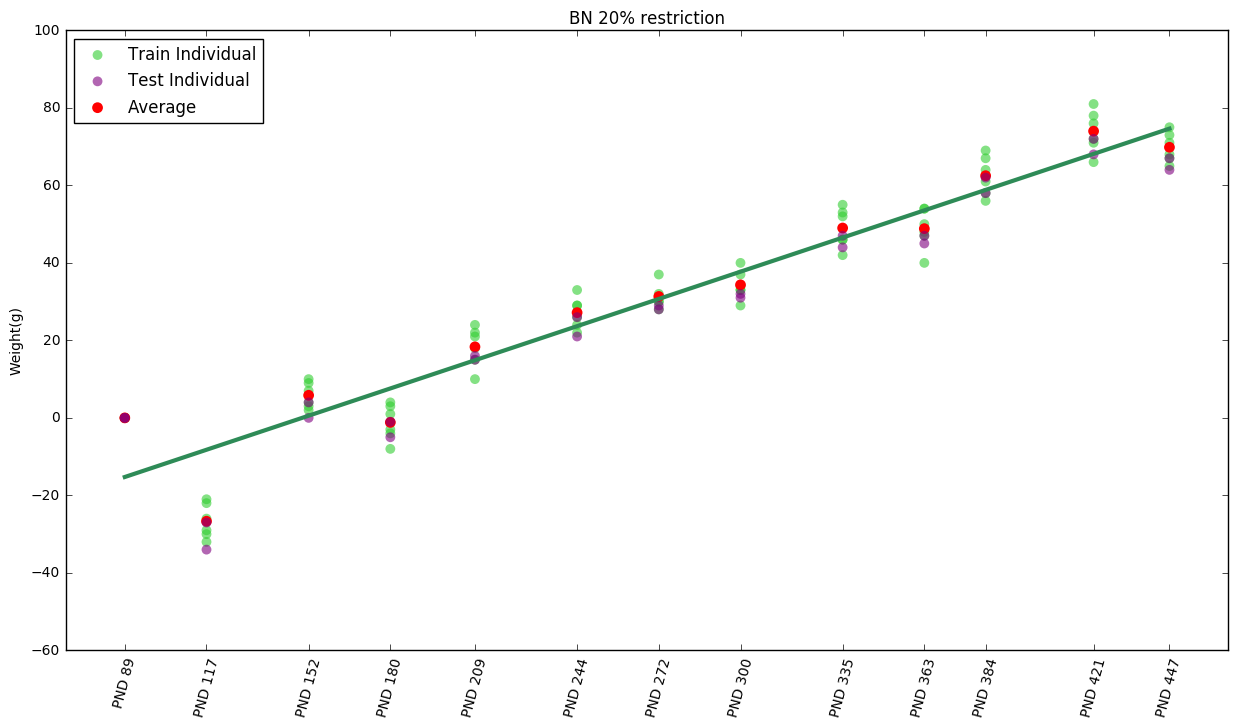

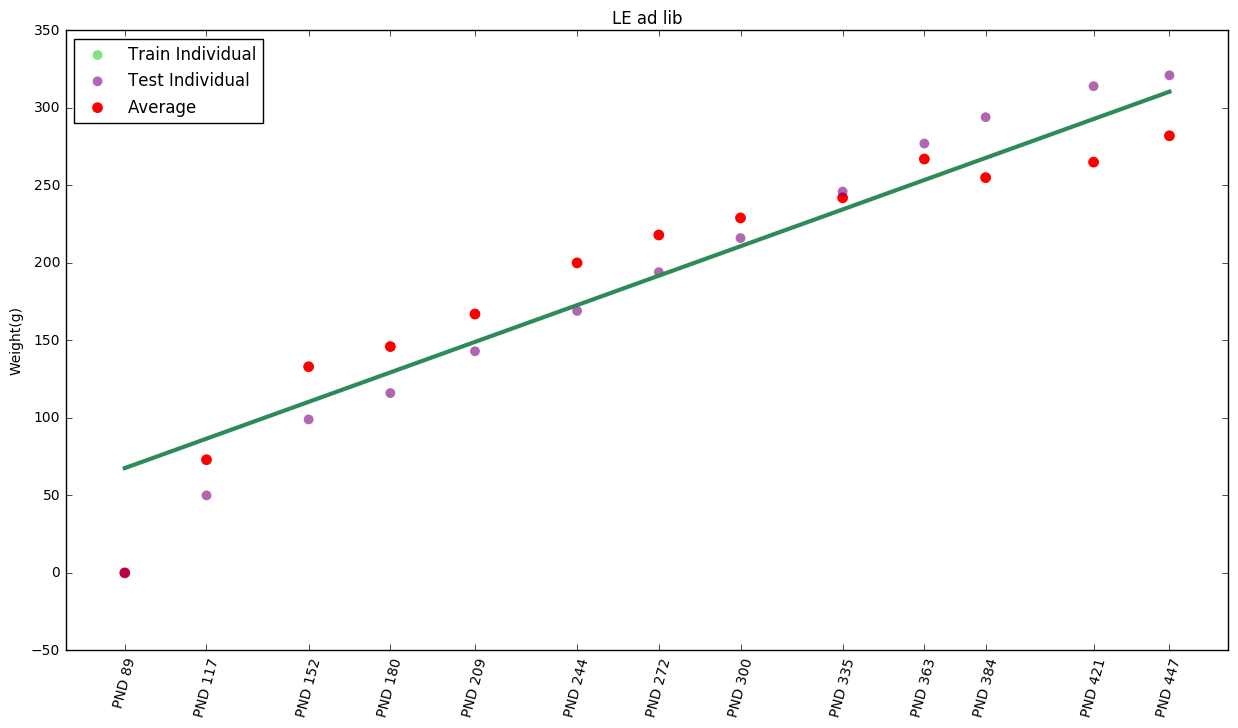

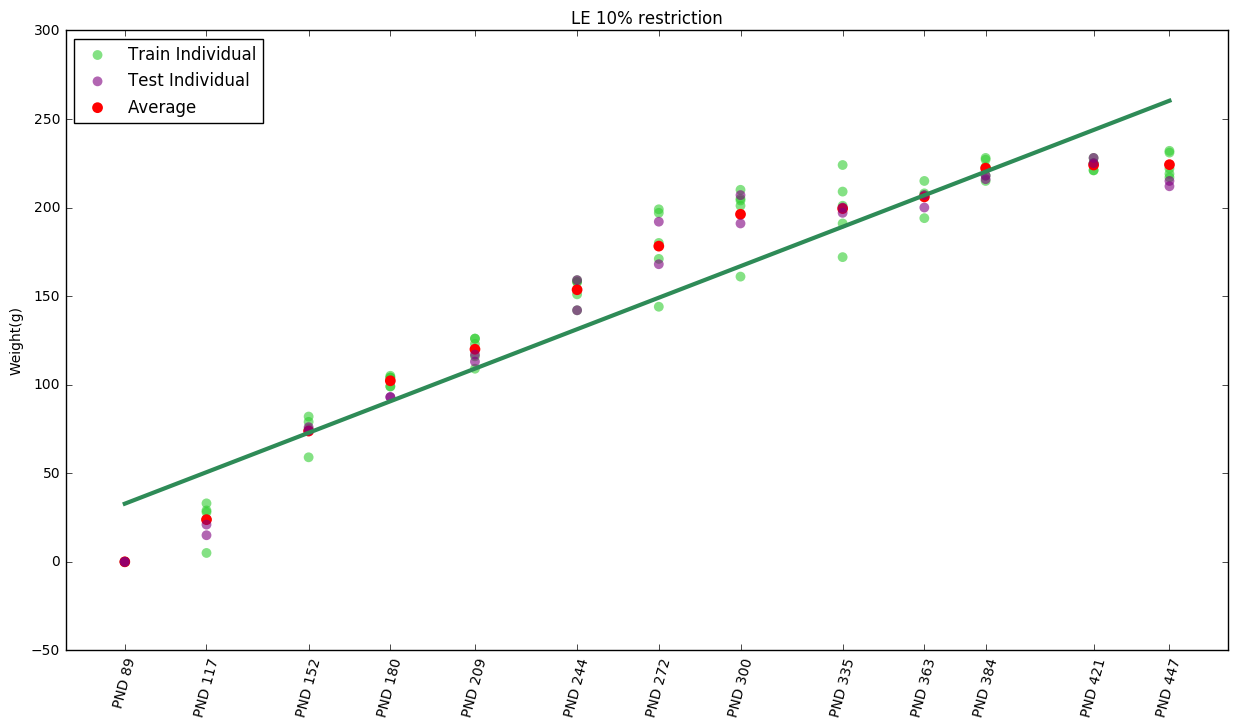

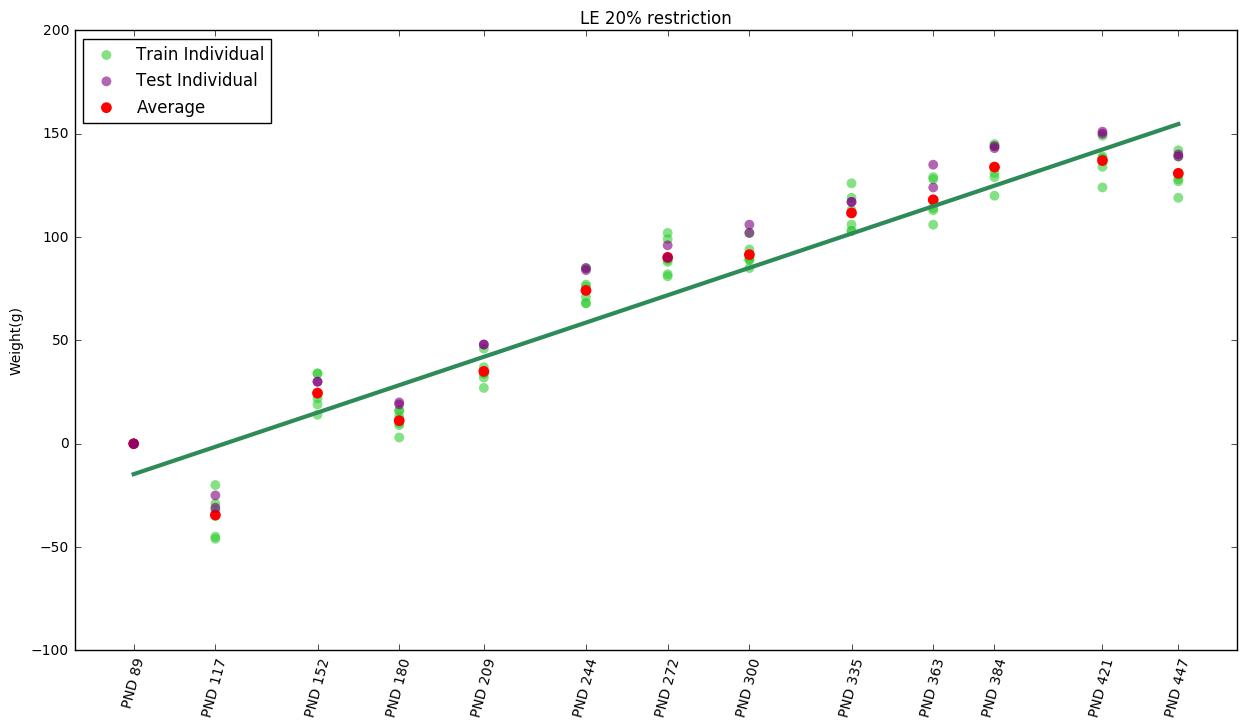

In [4]:
wtprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,wtprediction[i],testdiff=group_measure(groups[i],'Sample Weight (g)')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), wtprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('Weight(g)')
    print(groups[i],'percentage error is: {0} %\n'.format(round(percenterror*100,2)))
    print(groups[i],'slope and intercept are',slope,'and',intercept)

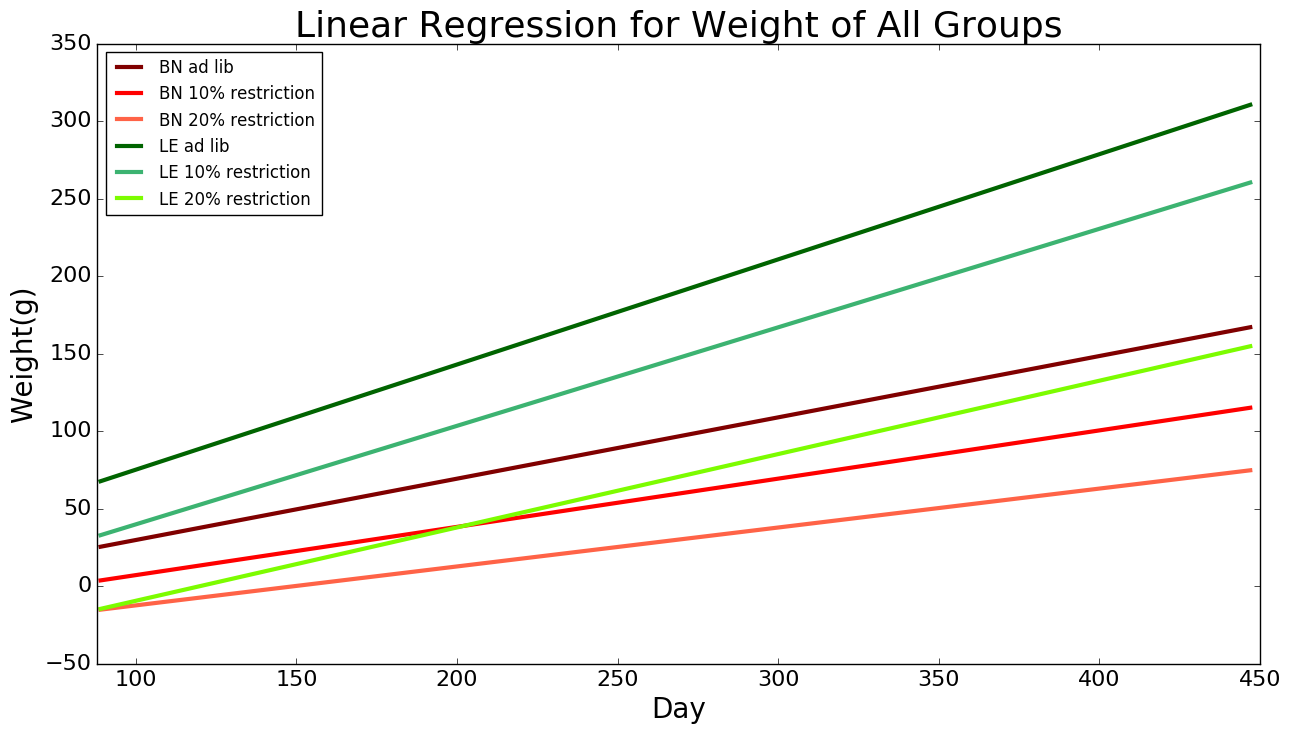

In [25]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), wtprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='upper left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(88,450)
plt.title('Linear Regression for Weight of All Groups', fontsize=26)
plt.ylabel('Weight(g)', fontsize=20)
plt.xlabel('Day', fontsize=20)

# % Fat

BN ad lib percentage error is: 86.97 %

BN ad lib slope and intercept are [ 0.01086743] and 0.215102823309
BN 10% restriction percentage error is: 26.02 %

BN 10% restriction slope and intercept are [ 0.00481147] and 1.55878311454
BN 20% restriction percentage error is: 45.89 %

BN 20% restriction slope and intercept are [ 0.00568317] and 1.47003392888
LE ad lib percentage error is: 37.73 %

LE ad lib slope and intercept are [ 0.0482324] and 1.05111248286
LE 10% restriction percentage error is: 6.84 %

LE 10% restriction slope and intercept are [ 0.02245335] and 0.152300047143
LE 20% restriction percentage error is: 59.18 %

LE 20% restriction slope and intercept are [ 0.02302381] and 0.423531423818


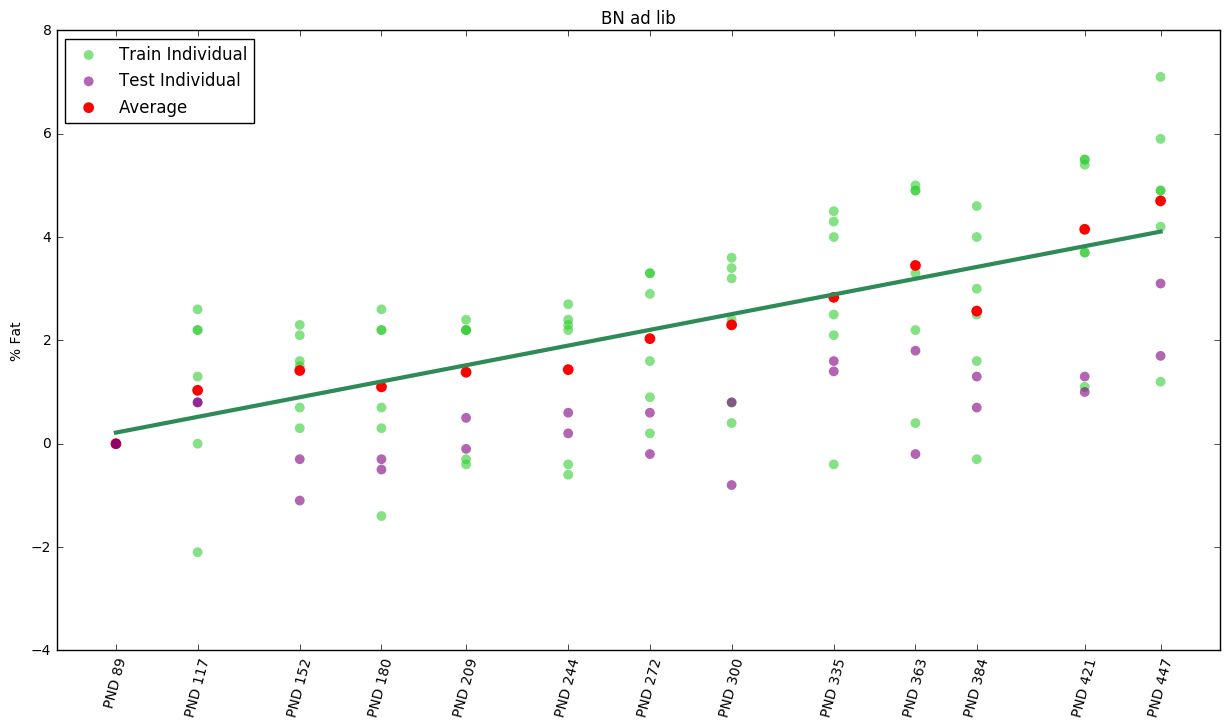

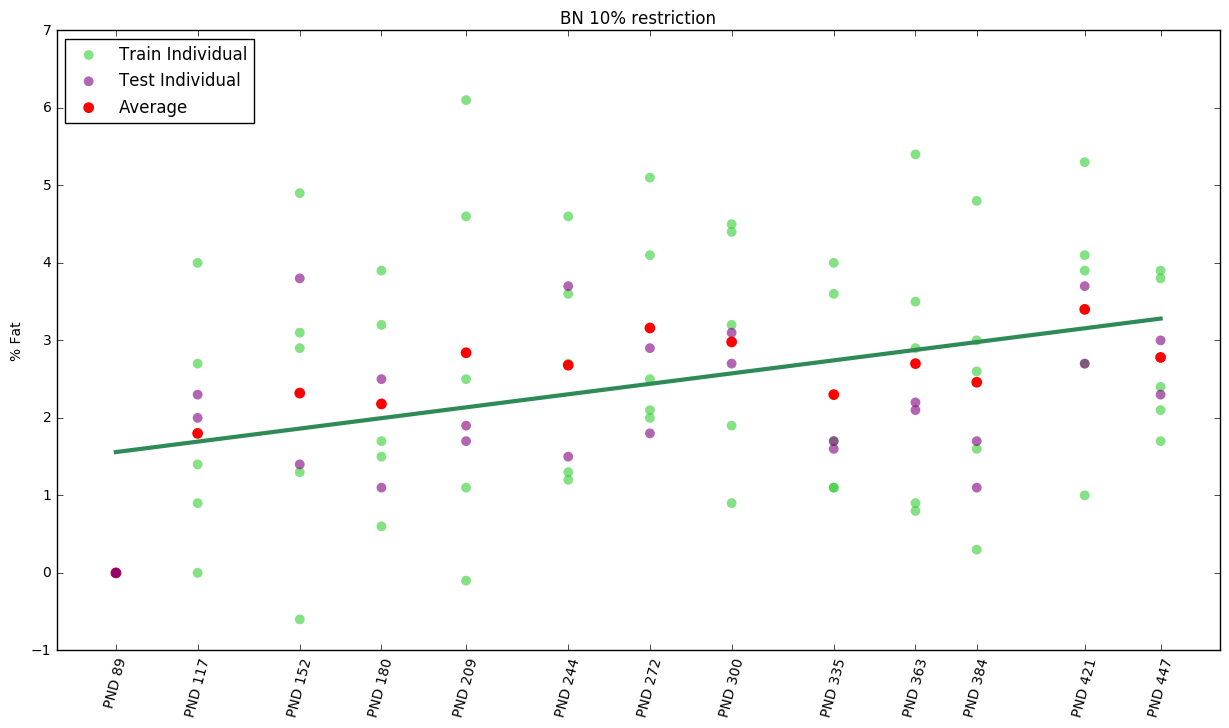

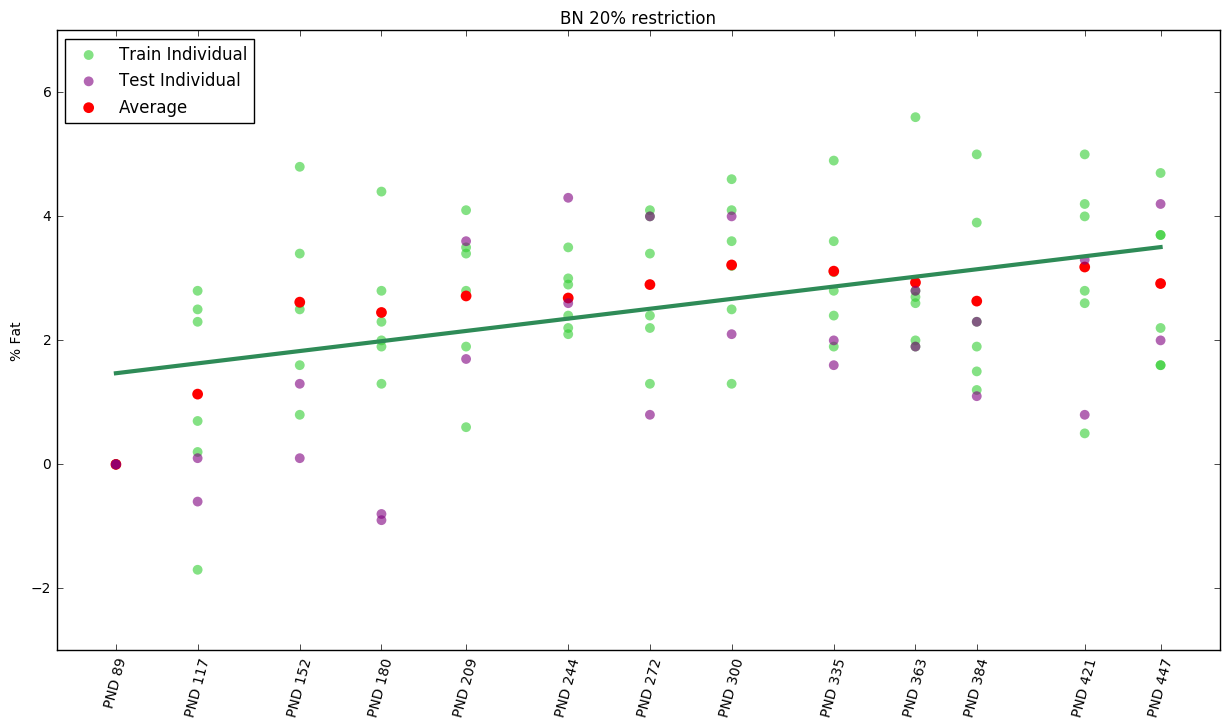

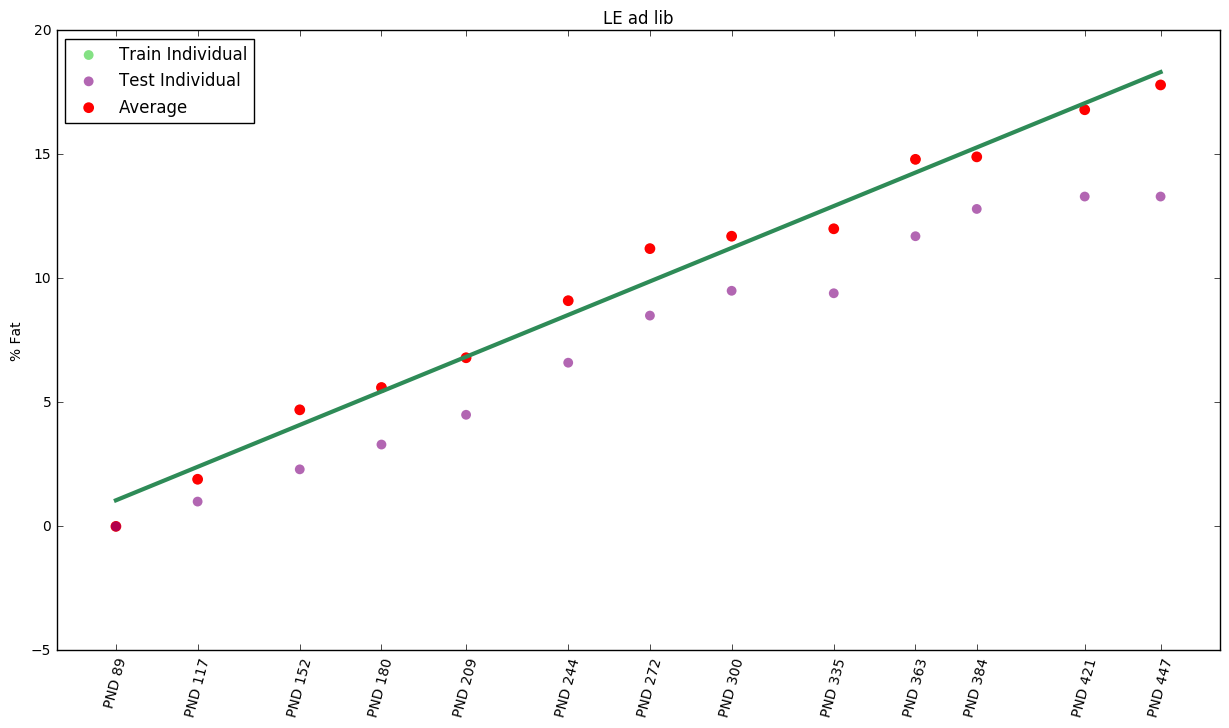

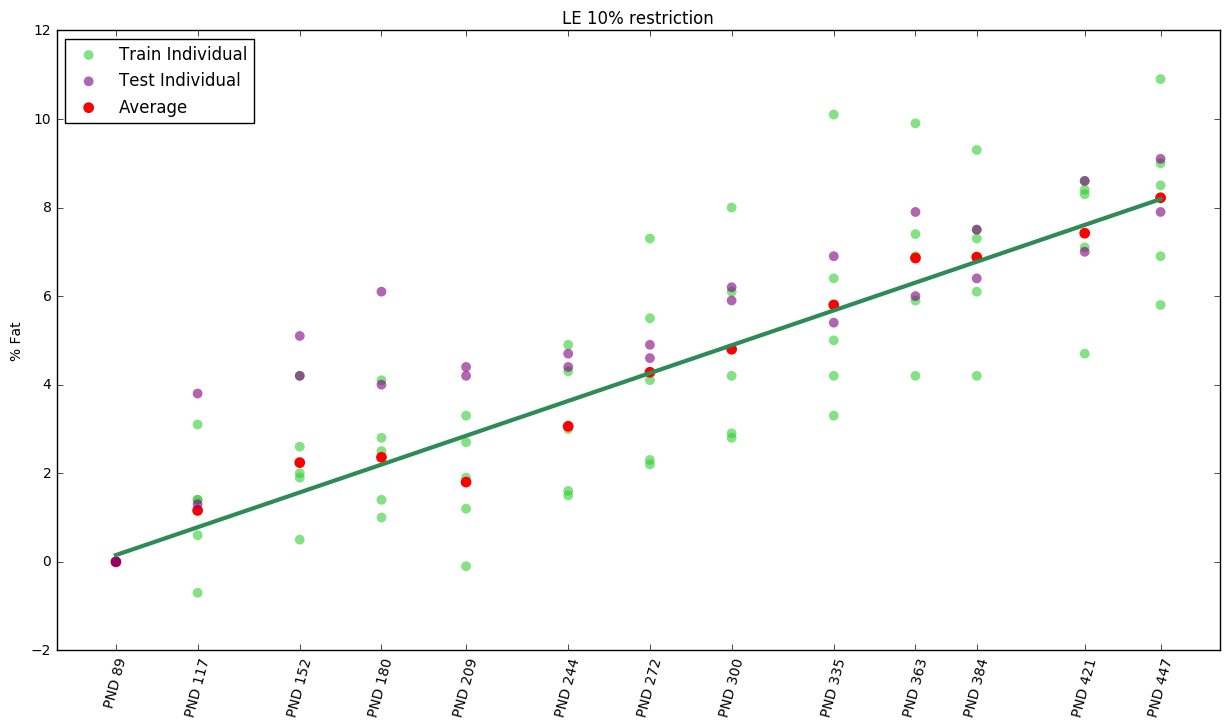

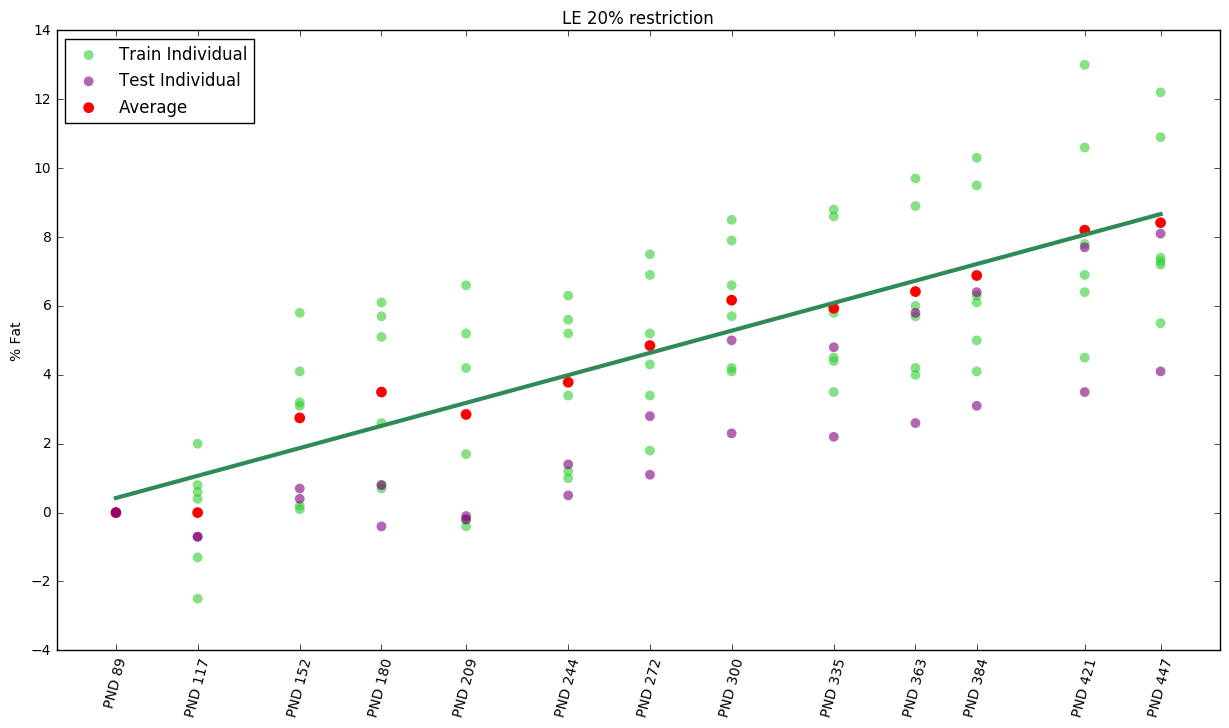

In [6]:
fatprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,fatprediction[i],testdiff=group_measure(groups[i],'% Fat')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), fatprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('% Fat')
    print(groups[i],'percentage error is: {0} %\n'.format(round(percenterror*100,2)))
    print(groups[i],'slope and intercept are',slope,'and',intercept)

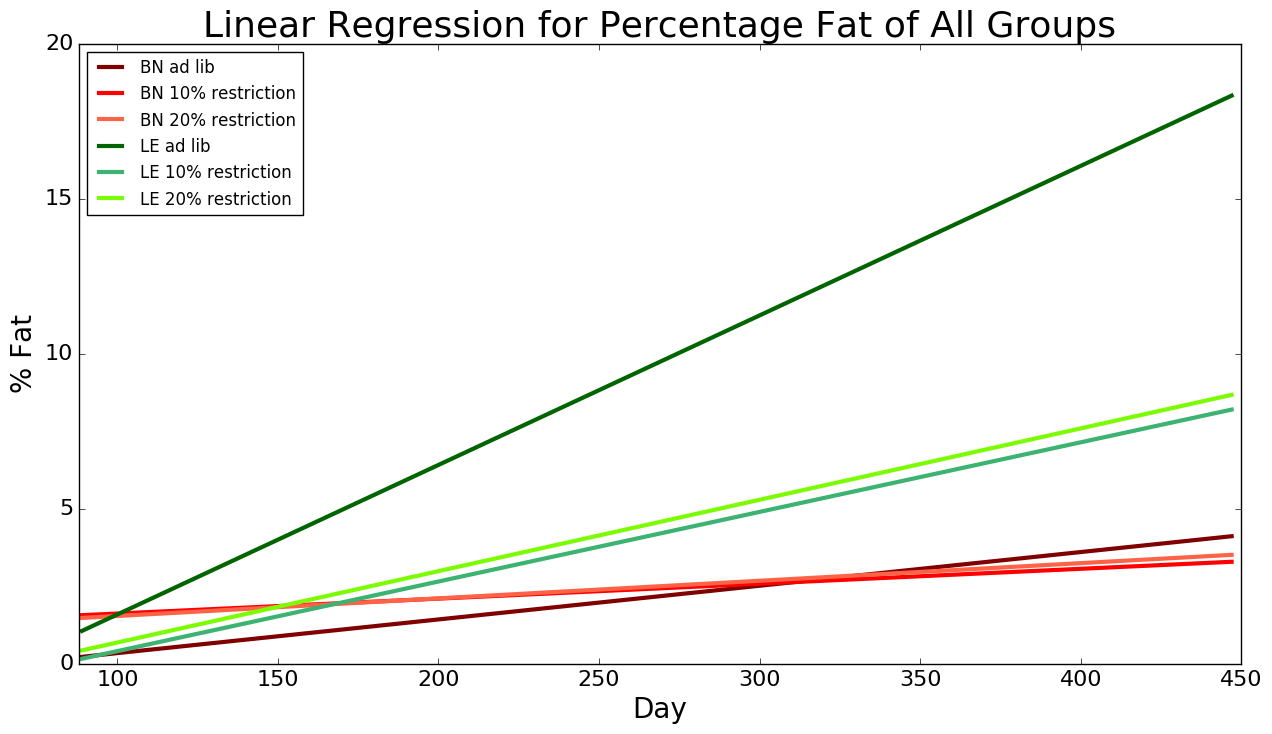

In [35]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), fatprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='upper left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(88,450)
plt.title('Linear Regression for Percentage Fat of All Groups', fontsize=26)
plt.ylabel('% Fat', fontsize=20)
plt.xlabel('Day', fontsize=20)

# % Lean

BN ad lib percentage error is: 45.88 %

BN ad lib slope and intercept are [-0.01075942] and -0.282113405344
BN 10% restriction percentage error is: 24.59 %

BN 10% restriction slope and intercept are [-0.00712543] and 1.00057842522
BN 20% restriction percentage error is: 82.68 %

BN 20% restriction slope and intercept are [-0.00329642] and 1.36279762269
LE ad lib percentage error is: 1.98 %

LE ad lib slope and intercept are [-0.01654675] and -0.501219143833
LE 10% restriction percentage error is: 259.38 %

LE 10% restriction slope and intercept are [-0.01091775] and -0.358291674234
LE 20% restriction percentage error is: 23.49 %

LE 20% restriction slope and intercept are [-0.01116766] and 1.01238501521


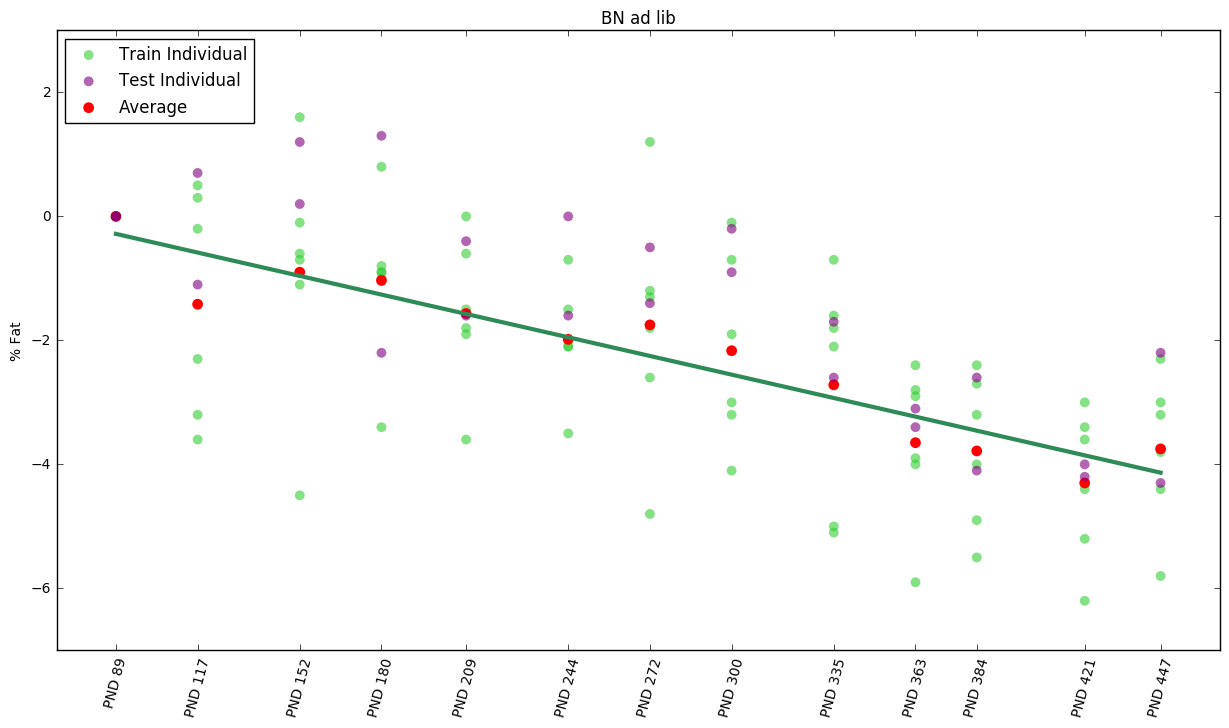

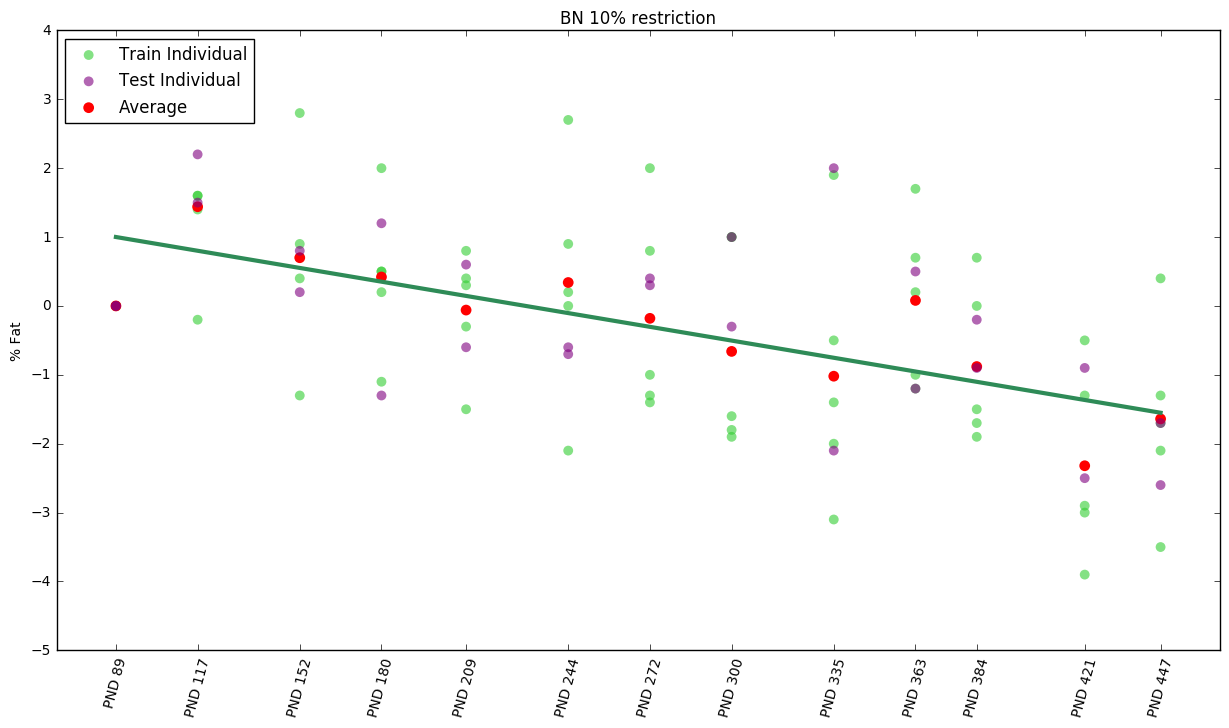

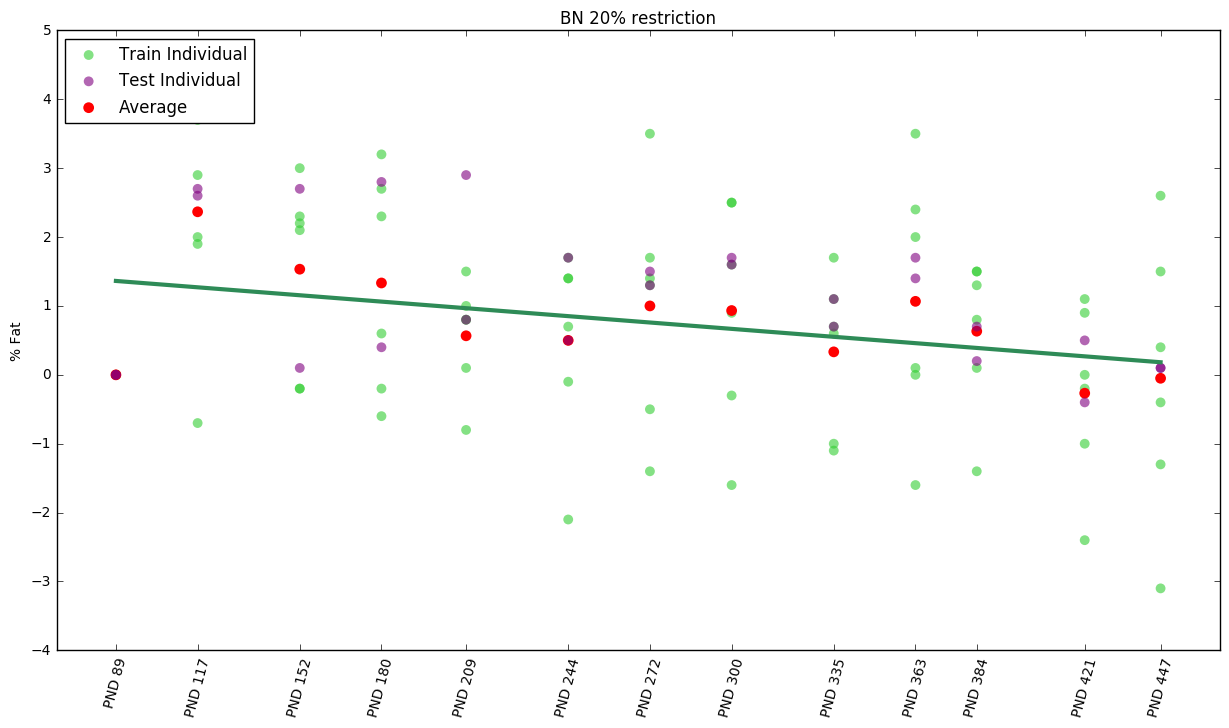

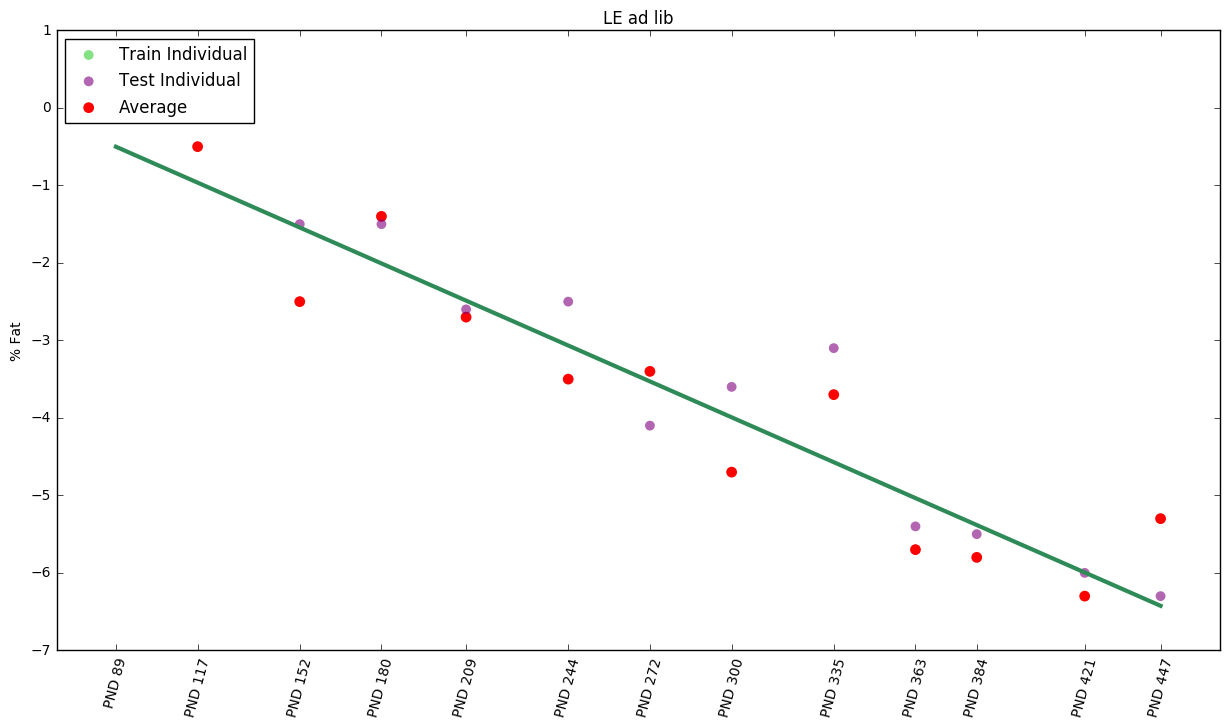

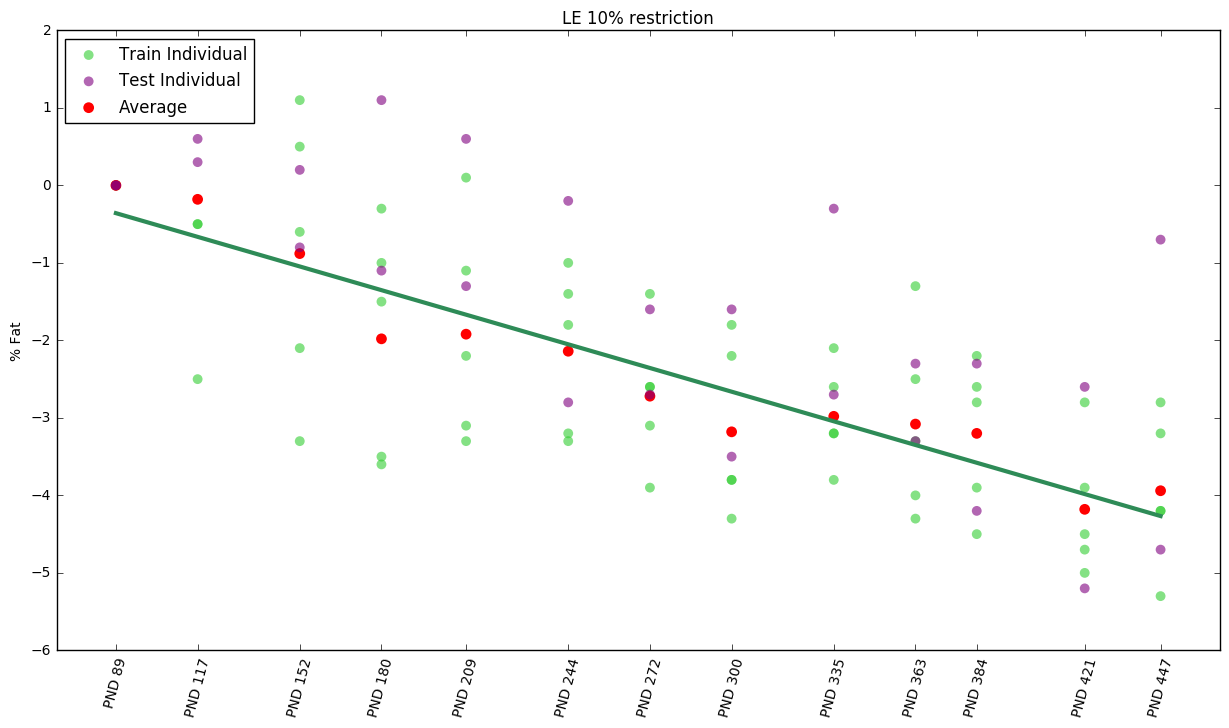

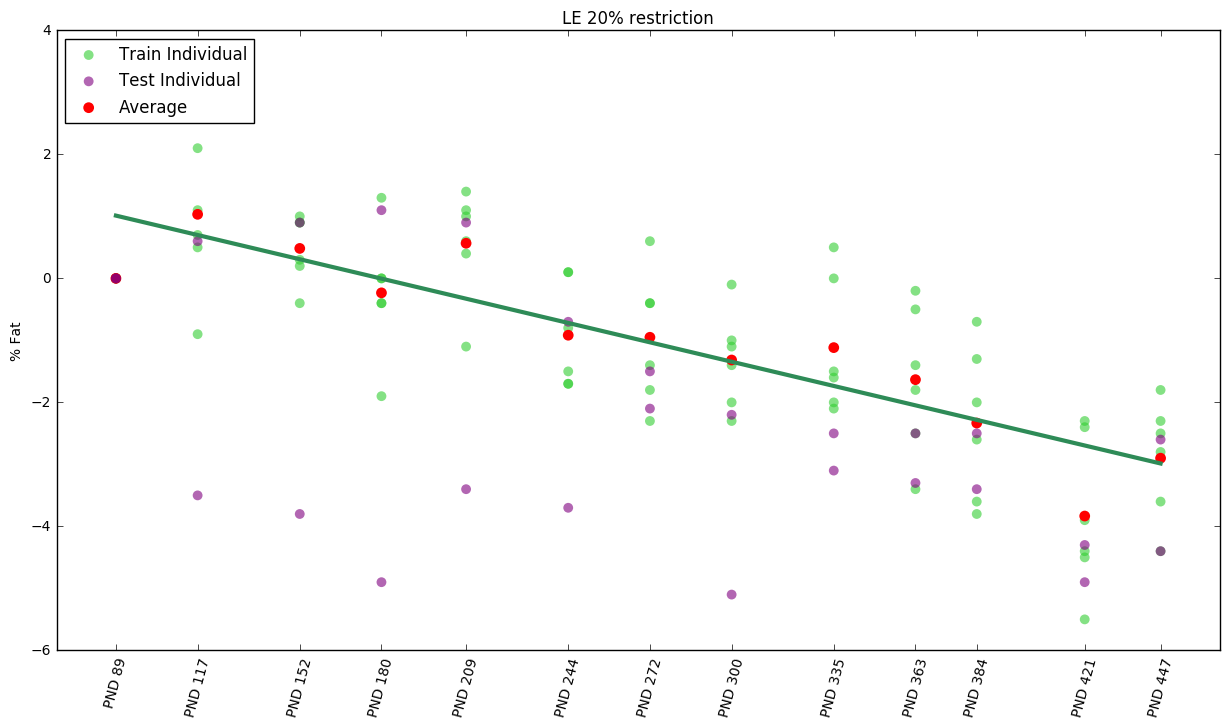

In [8]:
leprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,leprediction[i],testdiff=group_measure(groups[i],'% Lean')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), leprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('% Lean')
    print(groups[i],'percentage error is: {0} %\n'.format(round(percenterror*100,2)))
    print(groups[i],'slope and intercept are',slope,'and',intercept)

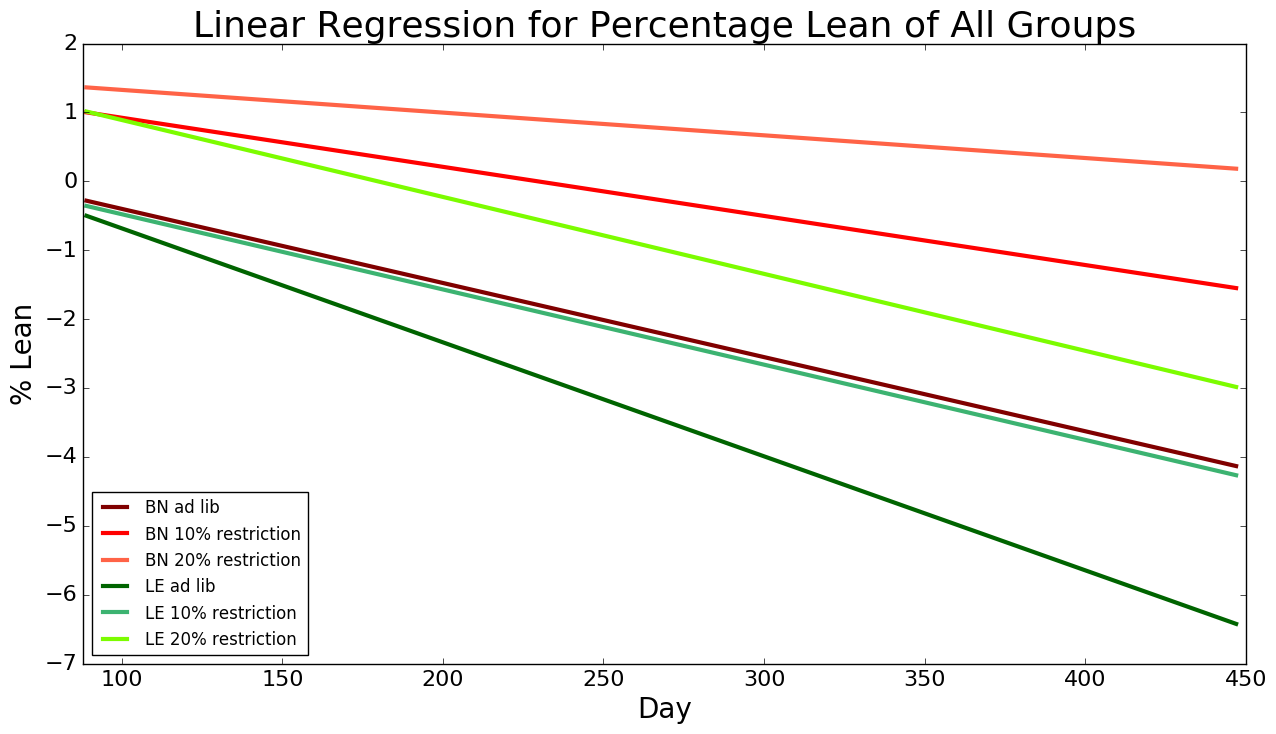

In [36]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), leprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='lower left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(88,450)
plt.title('Linear Regression for Percentage Lean of All Groups', fontsize=26)
plt.ylabel('% Lean', fontsize=20)
plt.xlabel('Day', fontsize=20)